# Balkendiagramm, Stabdiagramm und Säulendiagramm

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_bar_chart(data=None, frequency_table=None, frequency_table_relative=None, diagramm_typ="stabdiagramm", 
                     orientation="vertikal", title=None, xlabel=None, ylabel=None, frequency_type="absolute",
                     x_label_rotation=0):
    """
    Erstellt ein Stabdiagramm oder Balkendiagramm basierend auf den angegebenen textbasierten Daten oder einer Häufigkeitstabelle.
    Die Funktion berechnet automatisch die Häufigkeit jeder Kategorie, wenn keine Häufigkeitstabelle übergeben wird.
    Der Typ des Diagramms kann spezifiziert werden: "stabdiagramm" (sehr schmale Balken), "balkendiagramm" 
    für Balkendiagramme. Balkendiagramme können vertikal oder horizontal abgetragen werden.

    Parameters
    ----------
    data : list, optional
        Eine Liste von textbasierten Werten (Kategorien), die im Stabdiagramm dargestellt werden sollen.
        
    frequency_table : list of tuples, optional
        Eine Liste von Tupeln, wobei das erste Element die Kategorie und das zweite Element die Häufigkeit ist.
    
    frequency_table_relative : list of tuples, optional
        Eine Liste von Tupeln, wobei das erste Element die Kategorie und das zweite Element die relative Häufigkeit ist.
        Wenn diese übergeben wird, wird `frequency_type` ignoriert, und die relative Häufigkeit wird direkt verwendet.
    
    diagramm_typ : str, optional
        "stabdiagramm" (schmale Balken) oder "balkendiagramm" für Balkendiagramme.
    
    orientation : str, optional
        "vertikal" oder "horizontal"; relevant bei `diagramm_typ='balkendiagramm'`.

    title, xlabel, ylabel : str, optional
        Titel des Diagramms und Beschriftungen für die x- und y-Achsen.

    frequency_type : str, optional
        "absolute" für absolute Häufigkeit, "relative" für relative Häufigkeit in Prozent.

    x_label_rotation : int, optional
        Winkel der Rotation für die x-Labels.

    Plot
    ----
    Ein matplotlib-Stabdiagramm oder Balkendiagramm mit:
        - Darstellung der Häufigkeiten der Kategorien.
        - Texten über jedem Balken für absolute oder relative Häufigkeit.
    """
    
    if frequency_table_relative is not None:
        categories, frequencies = zip(*frequency_table_relative)
        ylabel = ylabel if ylabel else "Relative Häufigkeit (%)"
    elif frequency_table is not None:
        categories, frequencies = zip(*frequency_table)
    elif data is not None:
        categories, frequencies = np.unique(data, return_counts=True)
    else:
        raise ValueError("Entweder \"data\", \"frequency_table\" oder \"frequency_table_relative\" muss übergeben werden.")
    
    if frequency_table_relative is None and frequency_type == "relative":
        total = sum(frequencies)
        frequencies = [(freq / total) * 100 for freq in frequencies]
        ylabel = ylabel if ylabel else "Häufigkeit (%)"

    fig, axes = plt.subplots(figsize=(8, 6))
    
    sns.set_palette("crest")

    if diagramm_typ == "stabdiagramm":
        sns.barplot(x=categories, y=frequencies, ax=axes, edgecolor="black", width=0.2)
        axes.set_xlabel(xlabel if xlabel else "Kategorien")
        axes.set_ylabel(ylabel)

    elif diagramm_typ == "balkendiagramm":
        if orientation == "vertikal":
            sns.barplot(x=categories, y=frequencies, ax=axes, edgecolor="black")
            axes.set_xlabel(xlabel if xlabel else "Kategorien")
            axes.set_ylabel(ylabel)
        elif orientation == "horizontal":
            sns.barplot(x=frequencies, y=categories, ax=axes, edgecolor="black")
            axes.set_xlabel(xlabel if xlabel else "Häufigkeit")
            axes.set_ylabel(ylabel if ylabel else "Kategorien")
        else:
            raise ValueError("Ungültige Orientierung. Verwende \"vertikal\" oder \"horizontal\".")
    else:
        raise ValueError("Ungültiger Diagrammtyp. Verwende \"stabdiagramm\" oder \"balkendiagramm\".")
    
    # Rotation der x-Labels anwenden, wenn die x-Achse Kategorien enthält (vertikale Stab- oder Balkendiagramme)
    if orientation == "vertikal" or diagramm_typ == "stabdiagramm":
        plt.setp(axes.get_xticklabels(), rotation=x_label_rotation)

    for i, freq in enumerate(frequencies):
        label = f"{freq:.1f}%" if frequency_table_relative or frequency_type == "relative" else str(int(freq))
        if diagramm_typ == "stabdiagramm":
            axes.text(i, freq + 0.05, label, ha="center", fontsize=10)
            axes.vlines(x=i, ymin=0, ymax=freq, color="grey", linestyle="--", alpha=0.3)
        elif diagramm_typ == "balkendiagramm":
            if orientation == "vertikal":
                axes.text(i, freq + 0.05, label, ha="center", fontsize=10)
            elif orientation == "horizontal":
                axes.text(freq + 0.05, i, label, va="center", fontsize=10)
    
    axes.set_title(title if title else f"{diagramm_typ.capitalize()} der Kategorien")
    axes.grid(True, linestyle="--", alpha=0.7, axis="y" if diagramm_typ == "stabdiagramm" or orientation == "vertikal" else "x")

    if frequency_table_relative or frequency_type == "relative":
        if diagramm_typ == "stabdiagramm" or (diagramm_typ == "balkendiagramm" and orientation == "vertikal"):
            axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
        elif diagramm_typ == "balkendiagramm" and orientation == "horizontal":
            axes.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
    
    sns.despine()
    plt.tight_layout()


## 1. Beispiel: Stabdiagramm

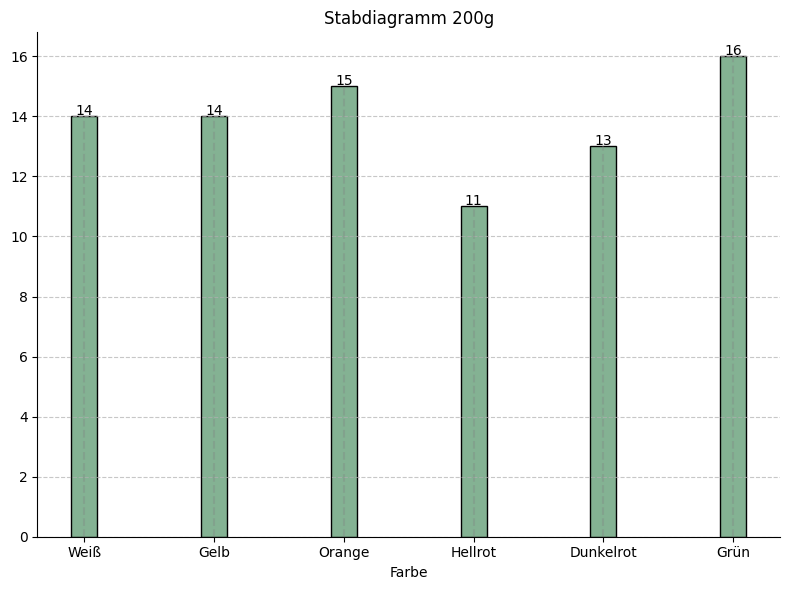

In [41]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="stabdiagramm", orientation="horizontal", title="Stabdiagramm 200g", xlabel="Farbe")

## 2. Beispiel: Balkendiagramm vertikal

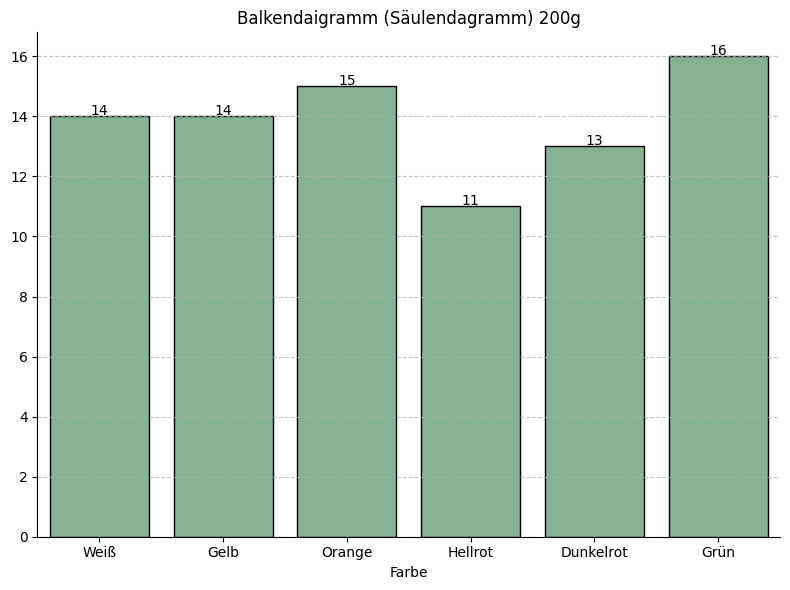

In [42]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="balkendiagramm", orientation="vertikal", title="Balkendaigramm (Säulendagramm) 200g", xlabel="Farbe")

## 3. Beispiel: Balkendiagramm horizontal (Stabdiagramm)

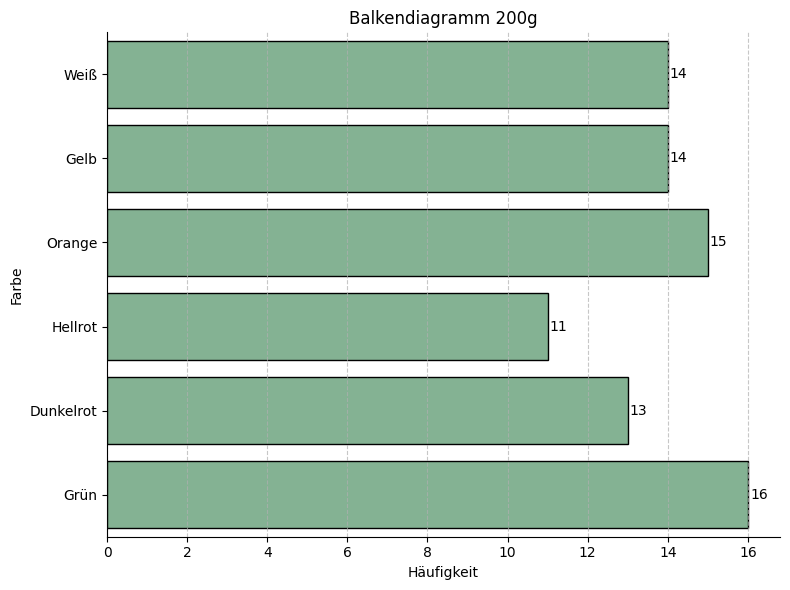

In [43]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="balkendiagramm", orientation="horizontal", title="Balkendiagramm 200g", ylabel="Farbe")

## 4. Beispiel: Stabdiagramm relative Häufigkeit

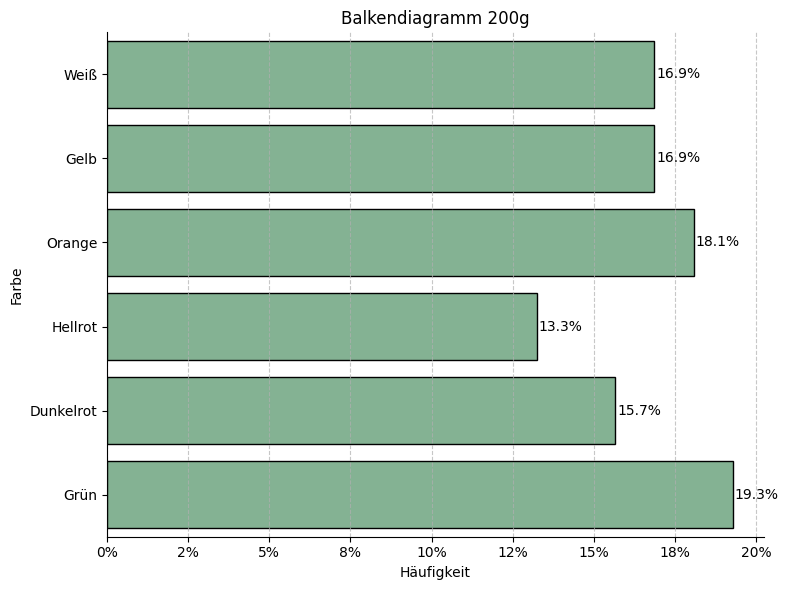

In [44]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="balkendiagramm", orientation="horizontal", title="Balkendiagramm 200g", ylabel="Farbe", frequency_type="relative")

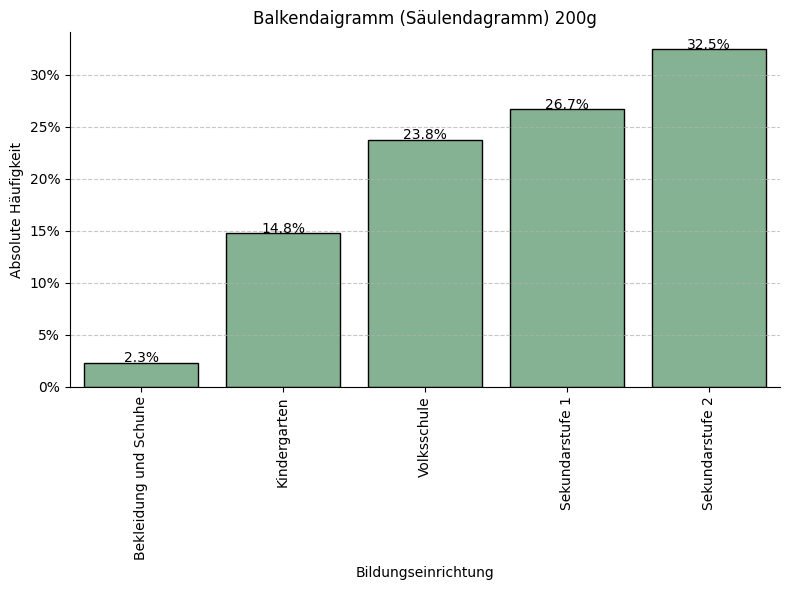

In [45]:
frequency_table = [('Bekleidung und Schuhe', 31000), ('Kindergarten', 200000), ('Volksschule', 322000), ('Sekundarstufe 1', 362000), ('Sekundarstufe 2', 440000)]
create_bar_chart(frequency_table=frequency_table, frequency_type="relative", diagramm_typ="balkendiagramm", orientation="vertikal", title="Balkendaigramm (Säulendagramm) 200g", xlabel="Bildungseinrichtung", ylabel="Absolute Häufigkeit", x_label_rotation=90)

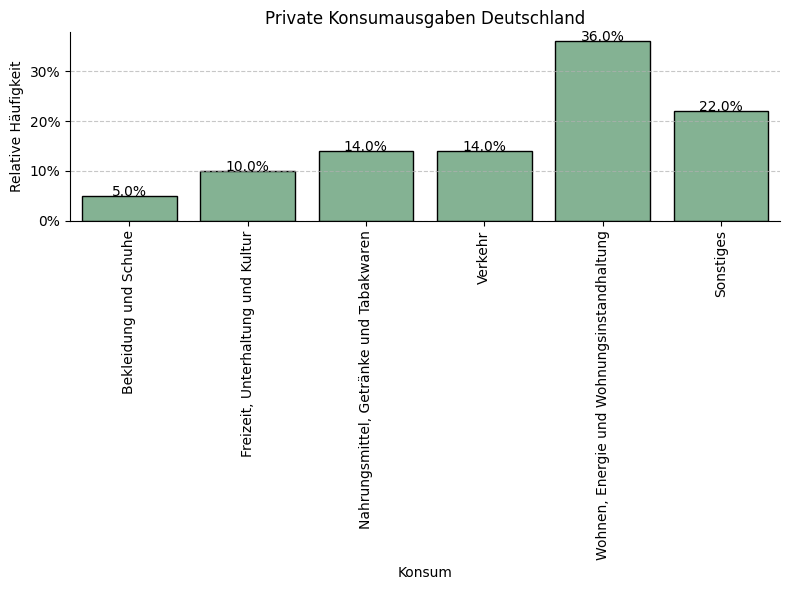

In [50]:
frequency_table = [('Bekleidung und Schuhe', 5), ('Freizeit, Unterhaltung und Kultur', 10), ('Nahrungsmittel, Getränke und Tabakwaren', 14), ('Verkehr', 14), ('Wohnen, Energie und Wohnungsinstandhaltung', 36), ('Sonstiges', 22)]
create_bar_chart(frequency_table_relative=frequency_table, frequency_type="relative", diagramm_typ="balkendiagramm", orientation="vertikal", title="Private Konsumausgaben Deutschland", xlabel="Konsum", ylabel="Relative Häufigkeit", x_label_rotation=90)